In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df = pd.read_csv('/content/drive/MyDrive/IPD/stress_and_sleep/SaYoPillow.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [39]:
df.rename(columns={
    'sr': 'Snoring_Range',
    'rr': 'Respiration_Rate',
    't': 'Body_Temperature',
    'lm': 'Limb_Movement',
    'bo': 'BloodO2',
    'rem': 'Eye_Movement',
    'sr.1': 'Hours_of_sleep',
    'hr': 'Heart_Rate',
    'sl': 'Stress_Level'
}, inplace=True)

In [40]:
df.head()

,Snoring_Range,Respiration_Rate,Body_Temperature,Limb_Movement,BloodO2,Eye_Movement,Hours_of_sleep,Heart_Rate,Stress_Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


Stress Levels

0 : low/normal

1 : medium low

2 : medium

3 : medium high

4 : high

In [41]:
df.isnull().sum()

,0
Snoring_Range,0
Respiration_Rate,0
Body_Temperature,0
Limb_Movement,0
BloodO2,0
Eye_Movement,0
Hours_of_sleep,0
Heart_Rate,0
Stress_Level,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Snoring_Range     630 non-null    float64
 1   Respiration_Rate  630 non-null    float64
 2   Body_Temperature  630 non-null    float64
 3   Limb_Movement     630 non-null    float64
 4   BloodO2           630 non-null    float64
 5   Eye_Movement      630 non-null    float64
 6   Hours_of_sleep    630 non-null    float64
 7   Heart_Rate        630 non-null    float64
 8   Stress_Level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [42]:
df.describe()

,Snoring_Range,Respiration_Rate,Body_Temperature,Limb_Movement,BloodO2,Eye_Movement,Hours_of_sleep,Heart_Rate,Stress_Level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [43]:
correlation_matrix = df.corr()

In [44]:
correlation_matrix

,Snoring_Range,Respiration_Rate,Body_Temperature,Limb_Movement,BloodO2,Eye_Movement,Hours_of_sleep,Heart_Rate,Stress_Level
Snoring_Range,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
Respiration_Rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
Body_Temperature,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
Limb_Movement,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
BloodO2,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
Eye_Movement,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
Hours_of_sleep,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
Heart_Rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
Stress_Level,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


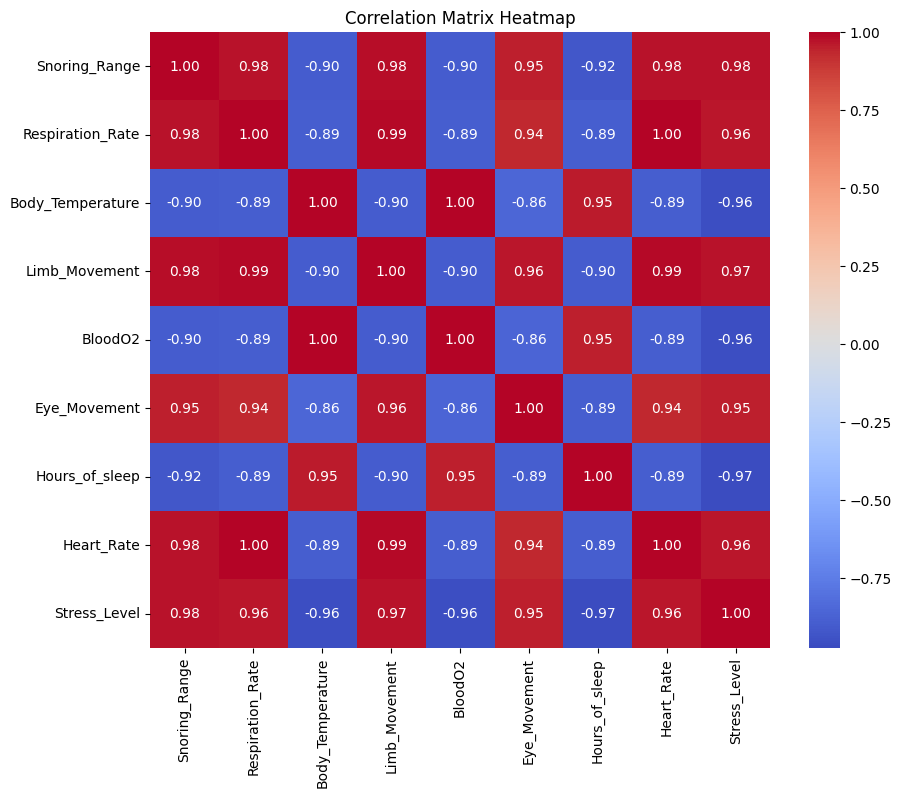

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

<ipython-input-46-d139875b35d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress_Level', data=df, palette='viridis')


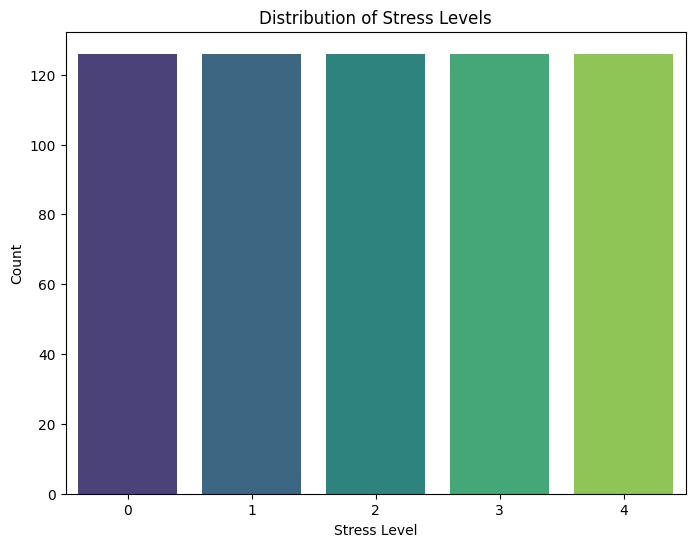

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', data=df, palette='viridis')
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

In [47]:
print(len(df[df["Stress_Level"]==0]))
print(len(df[df["Stress_Level"]==1]))
print(len(df[df["Stress_Level"]==2]))
print(len(df[df["Stress_Level"]==3]))

126
126
126
126


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X=df.drop(columns=['Stress_Level'],axis=1)
X=scaler.fit_transform(X)

y=df['Stress_Level']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)

In [60]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



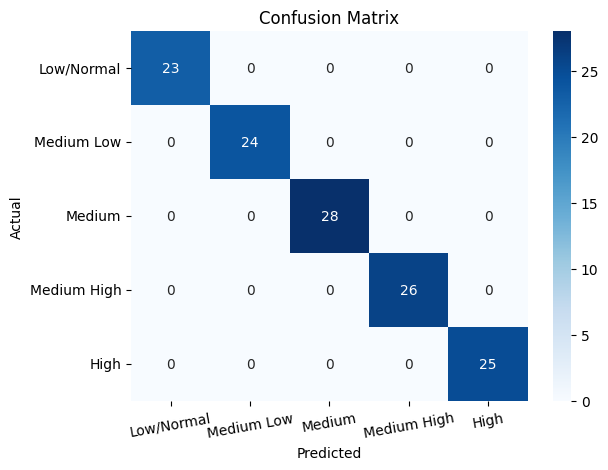

In [61]:
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low/Normal','Medium Low','Medium','Medium High','High'], yticklabels=['Low/Normal','Medium Low','Medium','Medium High','High'])
plt.xticks(rotation=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Classifier

In [62]:
from sklearn.svm import SVC

svc=SVC(kernel='poly',gamma='scale',C=0.3)

svc.fit(x_train,y_train)

SVC(C=0.3, kernel='poly')

In [63]:
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       0.90      1.00      0.95        28
           3       1.00      0.88      0.94        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



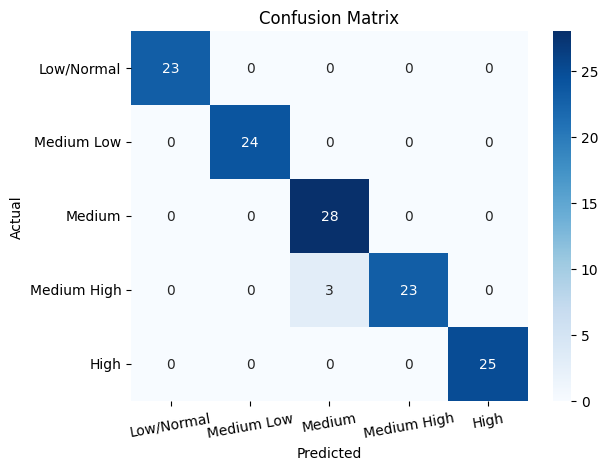

In [64]:
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low/Normal','Medium Low','Medium','Medium High','High'], yticklabels=['Low/Normal','Medium Low','Medium','Medium High','High'])
plt.xticks(rotation=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
import pickle
import sklearn

file_path='/content/drive/MyDrive/IPD/stress_and_sleep/SleepStress_SVC.pkl'
pickle.dump(svc, open(file_path, 'wb'.format(version=sklearn.__version__)))

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(splitter='random',criterion='gini')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(splitter='random')

In [69]:
y_pred=dtc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



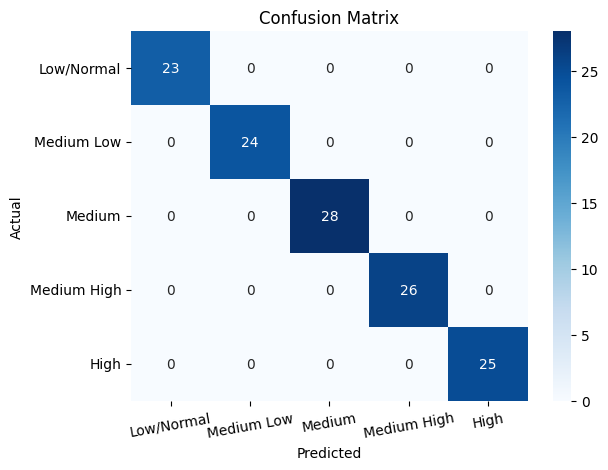

In [70]:
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low/Normal','Medium Low','Medium','Medium High','High'], yticklabels=['Low/Normal','Medium Low','Medium','Medium High','High'])
plt.xticks(rotation=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [75]:
print(sklearn.__version__)

1.3.2
